<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/Decisiontreeassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION TREE
Objective:
The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.
Tasks:
1. Data Preparation:
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).
2. Exploratory Data Analysis (EDA):
Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, and inconsistencies in the data.
Visualize the distribution of features, including histograms, box plots, and correlation matrices.
3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.
4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.
6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease',header=0,index_col=0)
df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,,,,,,,,,,,,
63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 63 to 57
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       908 non-null    object 
 1   cp        908 non-null    object 
 2   trestbps  908 non-null    int64  
 3   chol      908 non-null    int64  
 4   fbs       908 non-null    bool   
 5   restecg   908 non-null    object 
 6   thalch    908 non-null    int64  
 7   exang     908 non-null    object 
 8   oldpeak   846 non-null    float64
 9   slope     908 non-null    object 
 10  thal      908 non-null    object 
 11  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 86.0+ KB


In [ ]:
df.exang.value_counts

<bound method IndexOpsMixin.value_counts of age
63    False
41    False
57    False
52    False
57     True
      ...  
53    False
62     True
56     True
56     TURE
57    FALSE
Name: exang, Length: 908, dtype: object>

In [ ]:
df.isnull().sum()

,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62
slope,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,trestbps,chol,thalch,oldpeak,num
count,907.000000,907.000000,907.000000,845.000000,907.000000
mean,133.412348,201.465270,135.976847,0.892308,1.007718
std,20.405432,112.158285,26.813075,1.094092,1.144594
min,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,120.000000,176.500000,118.000000,0.000000,0.000000
50%,130.000000,224.000000,138.000000,0.500000,1.000000
75%,144.000000,270.000000,156.000000,1.500000,2.000000
max,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
target=df[['num']]
features=df.drop('num',axis=1)

In [ ]:
num_cols=[i for i in features.columns if features.dtypes[i]!='O']
num_cols
cat_cols=[i for i in features.columns if features.dtypes[i]=='O']
cat_cols

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
num_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
cat_imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [ ]:
num_cols1=pd.DataFrame(num_imputer.fit_transform(features[num_cols]),columns=num_cols, index=features.index)
cat_cols1=pd.DataFrame(cat_imputer.fit_transform(features[cat_cols]) ,columns=cat_cols, index=features.index)

In [ ]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
stdsca=StandardScaler()

In [ ]:

num_cols1=pd.DataFrame(stdsca.fit_transform(num_cols1),columns=num_cols)

In [ ]:
num_cols1.head()

,trestbps,chol,fbs,thalch,oldpeak
0,0.568184,0.281318,1.975526,0.523285,1.333786
1,0.077848,0.013691,-0.506194,-0.148399,-0.845460
2,0.323016,-0.084439,-0.506194,0.448654,-0.466461
3,-0.755723,-0.137964,-0.506194,2.015918,-0.845460
4,-1.147992,-0.004151,-0.506194,-0.372294,0.575787


In [ ]:
cat_cols1

,sex,cp,restecg,exang,slope,thal
age,,,,,,
63,Male,typical angina,lv hypertrophy,False,downsloping,fixed defect
41,Male,atypical angina,normal,False,flat,fixed defect
57,Male,asymptomatic,normal,False,flat,fixed defect
52,Male,typical angina,lv hypertrophy,False,flat,fixed defect
57,Male,asymptomatic,normal,True,flat,fixed defect
...,...,...,...,...,...,...
53,Male,asymptomatic,normal,False,upsloping,reversable defect
62,Male,asymptomatic,st-t abnormality,True,flat,reversable defect
56,Male,non-anginal,lv hypertrophy,True,downsloping,normal


In [ ]:
features_scaled.corr()

,trestbps,chol,thalch,oldpeak,sex,cp,restecg,exang,slope,thal
trestbps,1.000000,0.117392,-0.132841,0.153079,0.015988,0.007944,0.056824,NaN,0.008262,0.056620
chol,0.117392,1.000000,0.198074,0.028892,-0.191632,0.071005,-0.195021,NaN,0.047655,-0.016900
thalch,-0.132841,0.198074,1.000000,-0.129477,-0.178484,0.249440,-0.194343,NaN,0.223212,0.005985
oldpeak,0.153079,0.028892,-0.129477,1.000000,0.101775,-0.169483,-0.030089,NaN,-0.186814,0.090347
sex,0.015988,-0.191632,-0.178484,0.101775,1.000000,-0.125986,0.077376,NaN,-0.044191,0.068596
cp,0.007944,0.071005,0.249440,-0.169483,-0.125986,1.000000,-0.074455,NaN,0.094762,-0.079809
restecg,0.056824,-0.195021,-0.194343,-0.030089,0.077376,-0.074455,1.000000,NaN,-0.082107,-0.111874
exang,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slope,0.008262,0.047655,0.223212,-0.186814,-0.044191,0.094762,-0.082107,NaN,1.000000,0.044312
thal,0.056620,-0.016900,0.005985,0.090347,0.068596,-0.079809,-0.111874,NaN,0.044312,1.000000


In [ ]:
features_scaled.drop(columns=['exang','restecg','slope','thal'],axis=1,inplace=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features_scaled,target,train_size=0.8,random_state=100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(725, 6)
(182, 6)
(725, 1)
(182, 1)


In [ ]:
dec_tree=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=4)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred=dec_tree.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5494505494505495

In [ ]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[3,4,5,6,7,8,9,10]}
grid=GridSearchCV(dec_tree,params,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [ ]:
target.num.unique()

array([0, 1, 2, 3, 4])

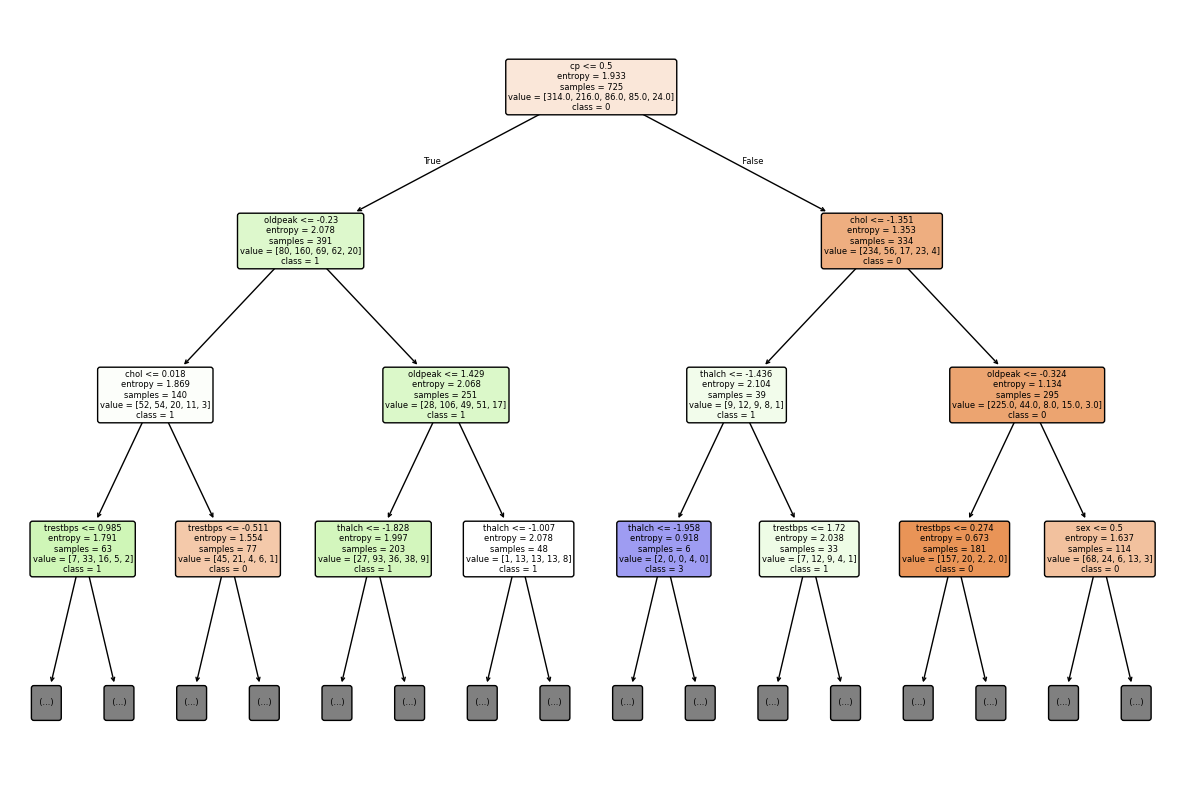

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(dec_tree,filled=True,rounded=True,feature_names=features_scaled.columns,class_names=[str(i) for i in target.num.unique()],max_depth=3,fontsize=6);

In [ ]:
feature_importances = pd.Series(dec_tree.feature_importances_, index=features_scaled.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 cp          0.387139
oldpeak     0.202690
chol        0.180778
trestbps    0.100071
thalch      0.094099
sex         0.035223
dtype: float64
